# **Project: Lending Club Study**

### Problem Statement
### Introduction

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic
understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval
based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).



### Data Description

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
- - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
- - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
- - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan.
- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset).

#### Data Dictionary
see the atatched xlsx file.

## Importing the necessary libraries

In [29]:
#Data management and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

## Import Dataset

In [30]:
data = pd.read_csv("loan.csv", low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [31]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [32]:
## checking all the columns on the Data
list(data.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [33]:
data.shape

(39717, 111)

* The dataset has **39717 rows and 111 columns**

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [35]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data

In [36]:
# checking for null values
data.isnull().sum()/len(data)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

Observations:
- Some Features need to be eliminated because all null values shows same amount as the total observation [No data 100%].
- Other Features null values need to be managed later.

In [37]:
## Cleaning the Null values and keeping only the ones with 2% and more null values
data = data[data.columns[((data.isnull().sum())/len(data)) < 0.02]]

In [38]:
# checking again for null values
data.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     50
total_acc     

- Data nearly Cleaned from significant Null values.
- we will fill the remaining null values with the median.
- let's check the shape of the data now.

In [39]:
data.shape

(39717, 51)

- 39717 Observation and only 51 columns.

In [40]:
# checking the number of unique values
data["id"].nunique()

39717

* All the values in the case id column are unique.
* We can drop this column.

In [41]:
data.drop(["id"], axis=1, inplace=True)

In [42]:
## lets check the data now
display(data.head())
data.info()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

Observations:
- Features ["term", "int_rate", "revol_util", "zip_code"] need to be reformated, and converted to numerical type.
- Features ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"] are date values.

In [43]:
data.term = data.term.str.rstrip('months').astype(np.number)
data.int_rate = data.int_rate.str.rstrip('%').astype(np.number)
data.revol_util = data.revol_util.str.rstrip('%').astype(np.number)
data.zip_code = data.zip_code.str.rstrip('xx').astype("int")

In [44]:
display(data.head())
data.info()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1311748,3000,3000,3000.0,60.0,12.69,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  float64
 5   int_rate                    39717 non-null  float64
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [45]:
## Let's delet the remaining null value for the EDA:
data.dropna(inplace=True)

In [46]:
data.shape

(38889, 50)

In [47]:
data.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,38889.0,862379.102317,253303.902751,80364.00,676102.000000,858856.000000,1.050364e+06,1.314167e+06
loan_amnt,38889.0,11255.750341,7471.719199,500.00,5500.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,38889.0,10980.728484,7199.253499,500.00,5500.000000,9750.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,38889.0,10557.129514,7103.862476,0.00,5000.000000,9000.000000,1.450000e+04,3.500000e+04
term,38889.0,42.539844,10.685955,36.00,36.000000,36.000000,6.000000e+01,6.000000e+01
int_rate,38889.0,12.037746,3.742412,5.42,9.250000,11.860000,1.461000e+01,2.459000e+01
installment,38889.0,324.950846,208.828630,16.08,167.340000,280.620000,4.311400e+02,1.305190e+03
annual_inc,38889.0,69033.085396,63198.111253,4000.00,40800.000000,59355.960000,8.250000e+04,6.000000e+06
zip_code,38889.0,502.986474,329.796929,7.00,200.000000,450.000000,8.520000e+02,9.990000e+02
dti,38889.0,13.365921,6.667663,0.00,8.240000,13.450000,1.863000e+01,2.999000e+01


Observations:
- Features ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'] need to be droped all statistical values are on 0.

In [49]:
data.drop(['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1, inplace=True)

In [50]:
# Making a list of all Categorical/Numerical variables
cat_col = list(data.select_dtypes("object").columns)
num_col = list(data.select_dtypes(np.number).columns)

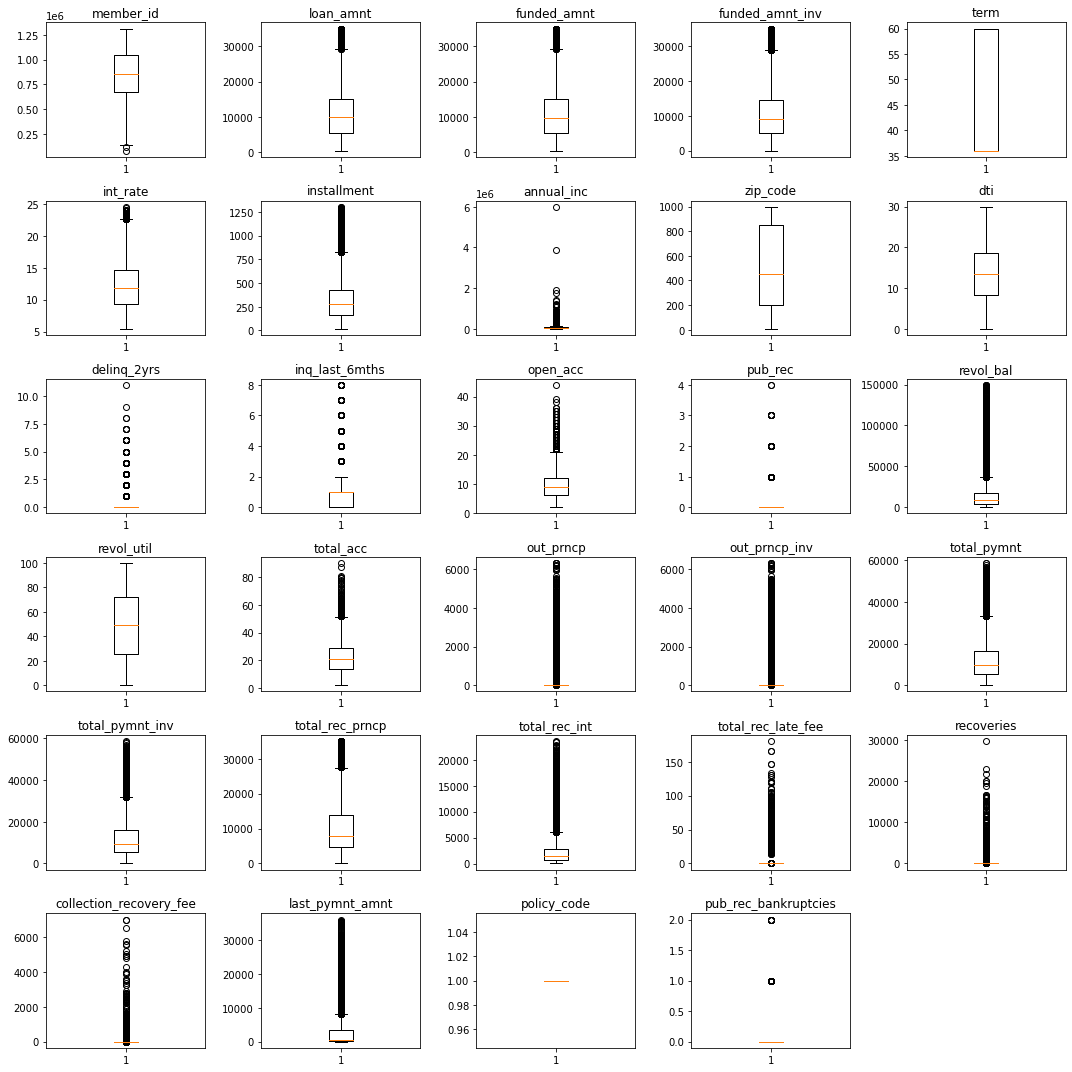

In [51]:
## Outliers Traitment [imputing the outliers to the value of the edges]

# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_col):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
- Outliers are nearly in every Variable, we will replace the values of those outliers with the quantiles limits for now.

In [52]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df


data = treat_outliers_all(data, num_col)
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1296599.0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1314167.0,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0.0,Apr-99,2.5,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,0.0,0.0,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1313524.0,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1277178.0,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,0.0,0.0,0.0,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
4,1311748.0,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,53.9,38.0,f,0.0,0.0,3513.330000,3513.33,2475.94,1037.39,0.0,0.0,0.0,May-16,67.79,May-16,1,INDIVIDUAL,0.0


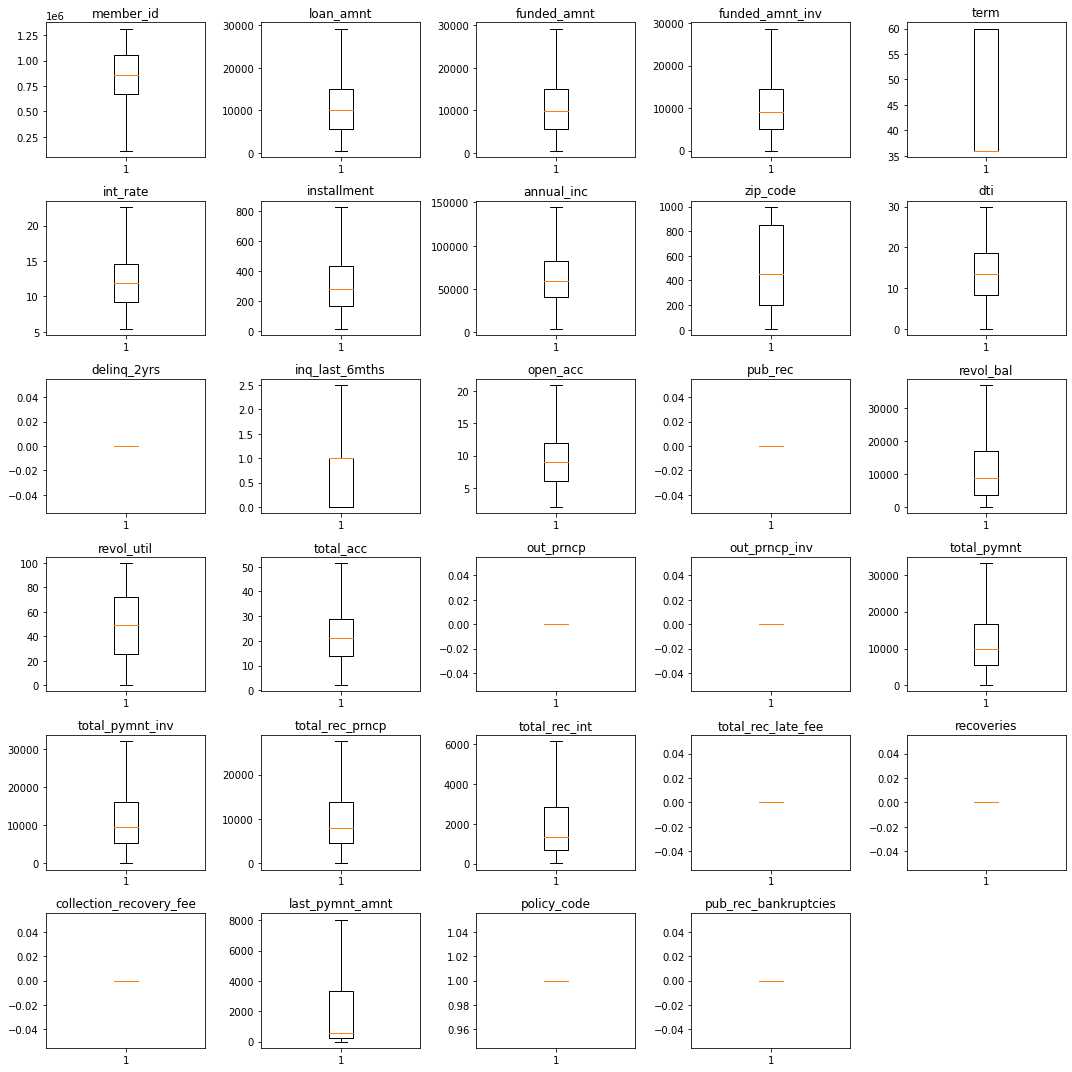

In [53]:
# let's plot again the boxplots of all columns to check for outliers
plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_col):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
- Outliers cleaned and replaced.

# Exploratory Data Analysis

## Univariate Analysis

In [54]:
data.shape

(38889, 45)

In [55]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1296599.0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1314167.0,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309,GA,1.00,0.0,Apr-99,2.5,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,0.0,0.0,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1313524.0,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1277178.0,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,0.0,0.0,0.0,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
4,1311748.0,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,53.9,38.0,f,0.0,0.0,3513.330000,3513.33,2475.94,1037.39,0.0,0.0,0.0,May-16,67.79,May-16,1,INDIVIDUAL,0.0


In [56]:
# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

B    0.303196
A    0.255496
C    0.202474
D    0.132762
E    0.071691
F    0.026408
G    0.007971
Name: grade, dtype: float64
--------------------------------------------------
B3    0.074031
A4    0.073440
A5    0.069583
B5    0.068374
B4    0.063283
C1    0.053486
B2    0.051634
C2    0.050528
B1    0.045874
A3    0.045488
C3    0.038186
A2    0.037980
D2    0.033866
C4    0.030728
C5    0.029546
D3    0.029468
A1    0.029006
D4    0.024506
D1    0.022963
D5    0.021960
E1    0.019389
E2    0.016457
E3    0.013989
E4    0.011417
E5    0.010440
F1    0.008357
F2    0.006223
F3    0.004680
F4    0.004166
F5    0.002983
G1    0.002571
G2    0.001980
G4    0.001440
G3    0.001234
G5    0.000746
Name: sub_grade, dtype: float64
--------------------------------------------------
RENT        0.473990
MORTGAGE    0.446836
OWN         0.076705
OTHER       0.002469
Name: home_ownership, dtype: float64
--------------------------------------------------
Not Verified       0.415362
Verified       

In [57]:
## Replacing the Variables with dates to years:
data['issue_d_year'] = pd.to_datetime(data['issue_d'],format='%b-%y').dt.year
data['last_pymnt_year'] = pd.to_datetime(data['last_pymnt_d'],format='%b-%y').dt.year
data['last_credit_pull_d_year'] = pd.to_datetime(data['last_credit_pull_d'],format='%b-%y').dt.year

cat_col = list(data.select_dtypes("object").columns)
num_col = list(data.select_dtypes(np.number).columns)

In [58]:
## Removing unecessary variables from the categorical list
cat_col.remove('loan_status')
cat_col.remove('issue_d')
cat_col.remove('url')
cat_col.remove('earliest_cr_line')
cat_col.remove('last_pymnt_d')
cat_col.remove('last_credit_pull_d')
cat_col.remove('title')

In [59]:
## Removing unecessary variables from the numerical list
num_col.remove('member_id')

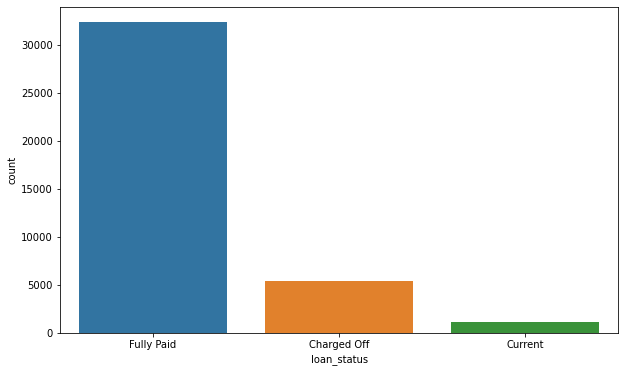

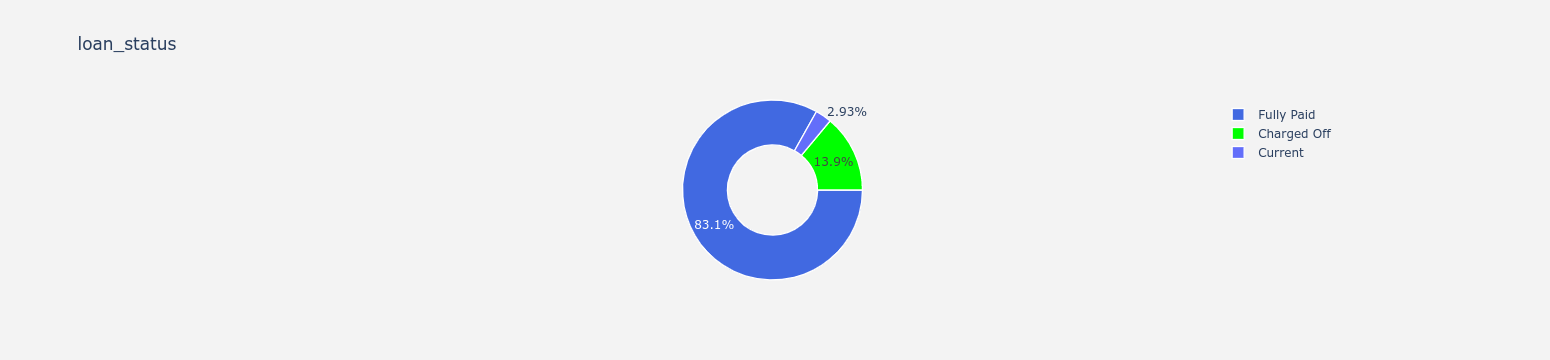

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=data)
plt.show()

#labels
lab = data["loan_status"].value_counts().keys().tolist()
#values
val = data["loan_status"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "loan_status",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data_ = [trace]
fig = go.Figure(data = data_,layout = layout)
py.iplot(fig)

Observations:
- Majority of customers are fully-paid {83%} folowed with the customer that are chanrged Off {14%} and didnt pay the due instatlment on time.
- Few customers are with loan status 'current' {3%} which mean the loan is not yet completed.

In [61]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=1, figsize=(15,7), bins = None):
    mean = np.mean(data)
    sns.set(font_scale = font_scale) # setting the font scale of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.25, .75)}, figsize = figsize) # creating the 2 subplot
    sns.boxplot(x = data, ax = ax_box2, showmeans = True, color = "violet") # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x = data, kde = False, ax = ax_hist2, bins = bins, palette="winter") if bins else sns.histplot(x = data, kde = False, ax = ax_hist2, color = "lightblue") # histogram will be made
    ax_hist2.axvline(mean, color = 'g', linestyle = '--') # mean will shown as vertical line in the histogram
    if xlabel: ax_hist2.set(xlabel = xlabel) # xlabel
    if title: ax_box2.set(title = title) # title of the graph
    plt.show() # display the graph

loan_amnt
Skew : 0.84


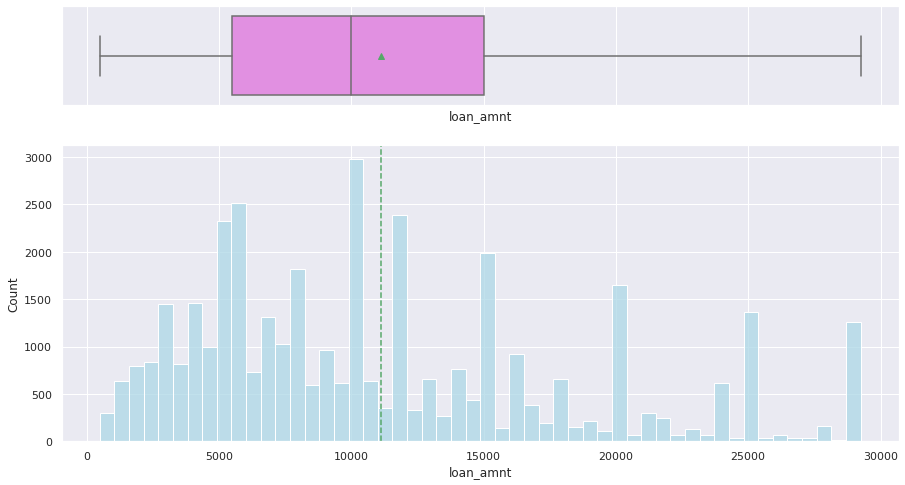

funded_amnt
Skew : 0.87


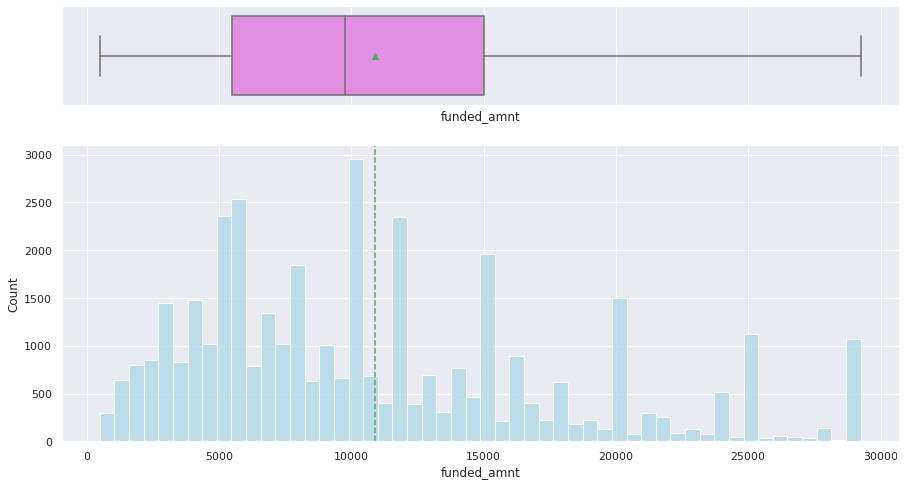

funded_amnt_inv
Skew : 0.89


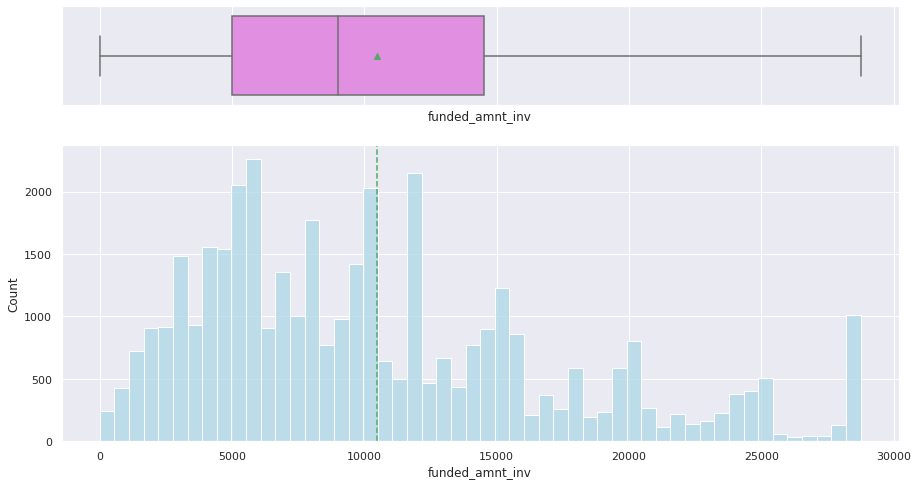

term
Skew : 1.02


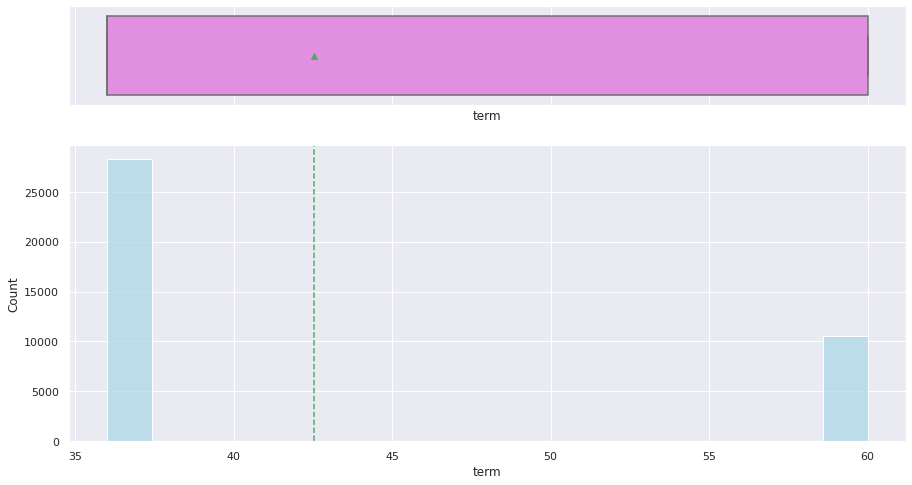

int_rate
Skew : 0.28


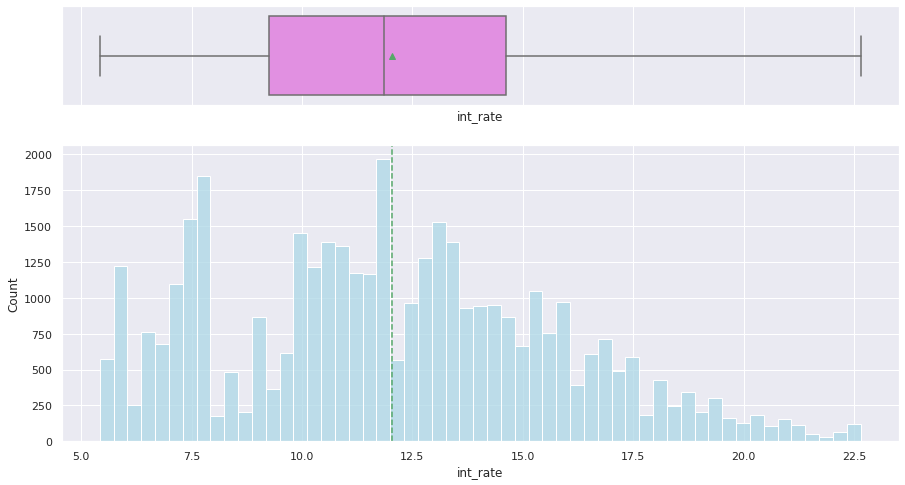

installment
Skew : 0.87


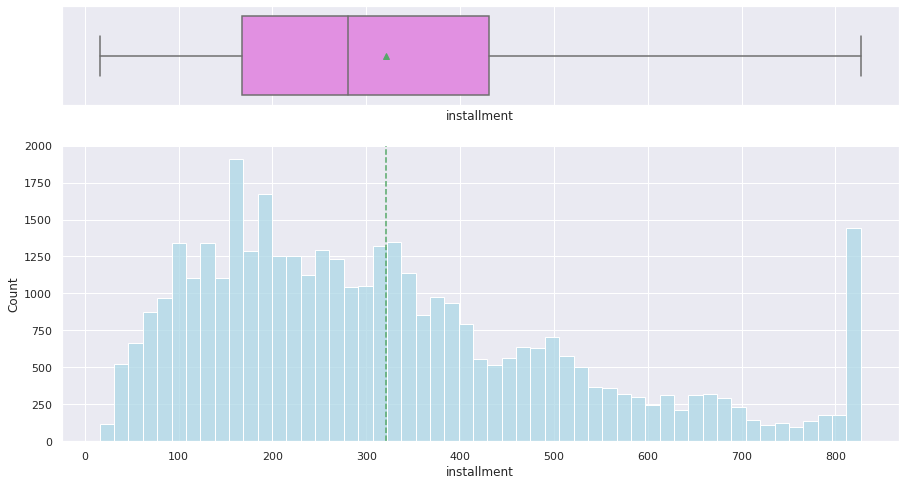

annual_inc
Skew : 0.85


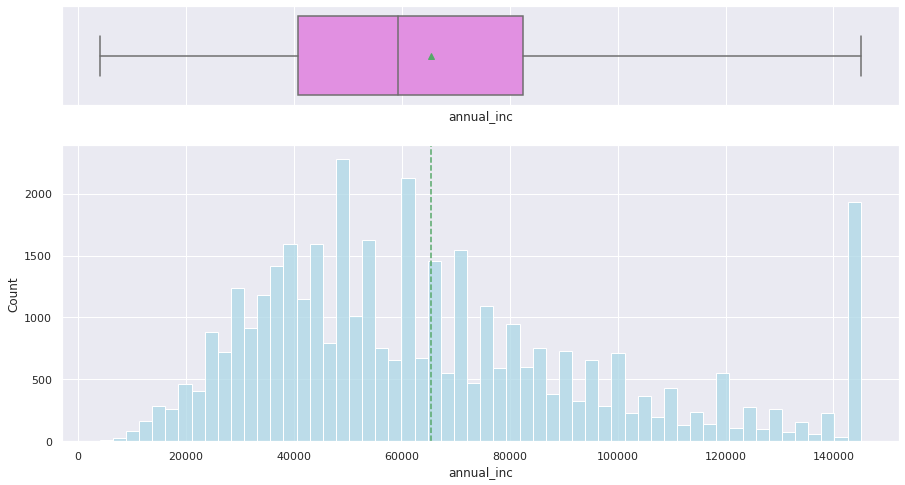

zip_code
Skew : 0.08


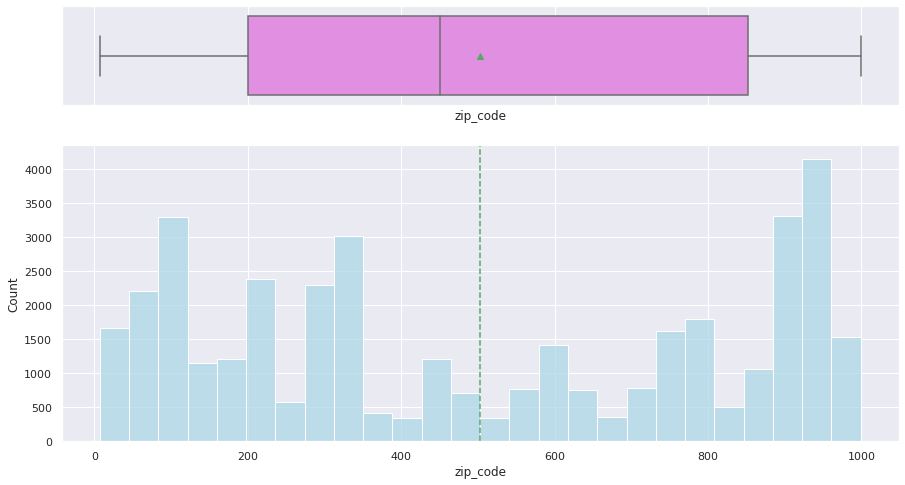

dti
Skew : -0.03


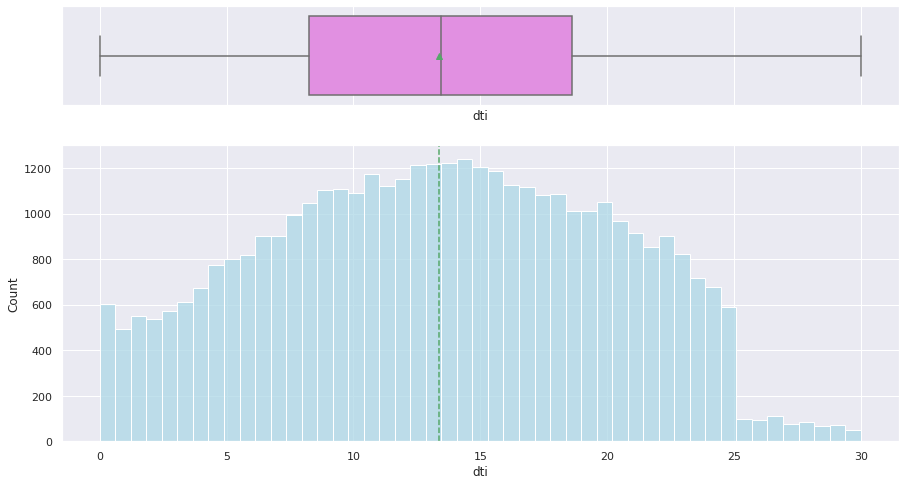

delinq_2yrs
Skew : 0


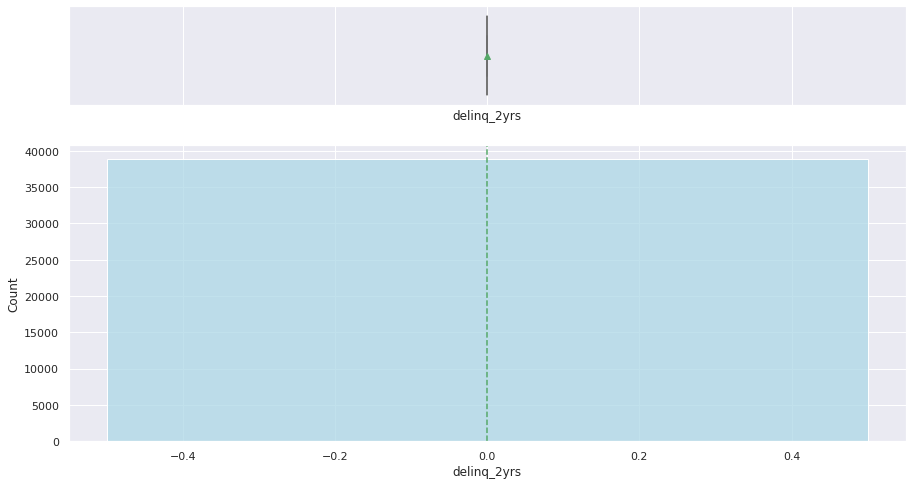

inq_last_6mths
Skew : 0.65


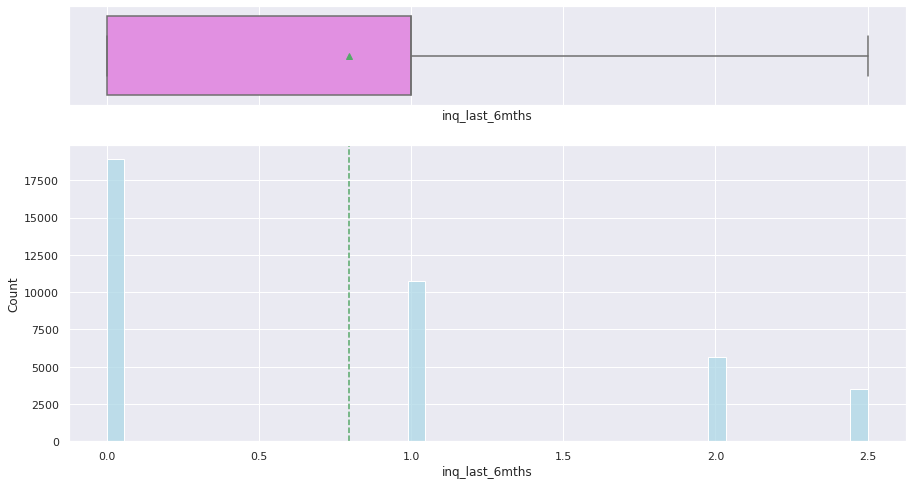

open_acc
Skew : 0.71


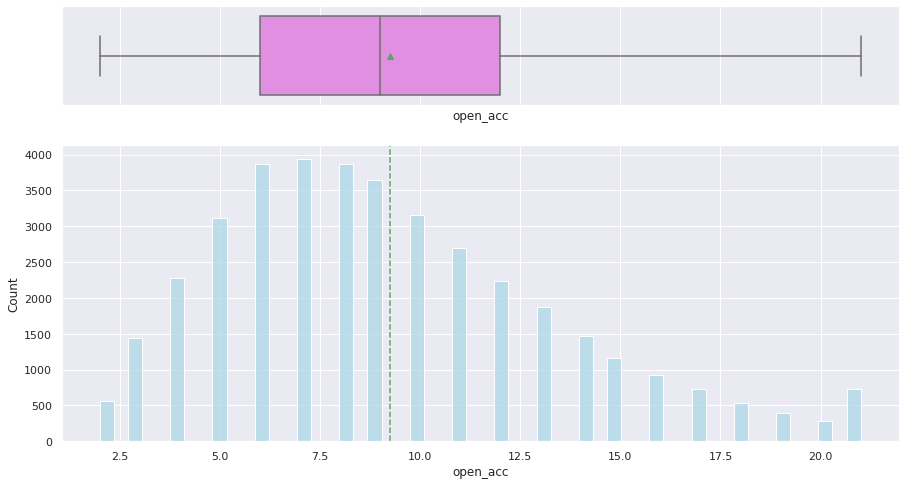

pub_rec
Skew : 0


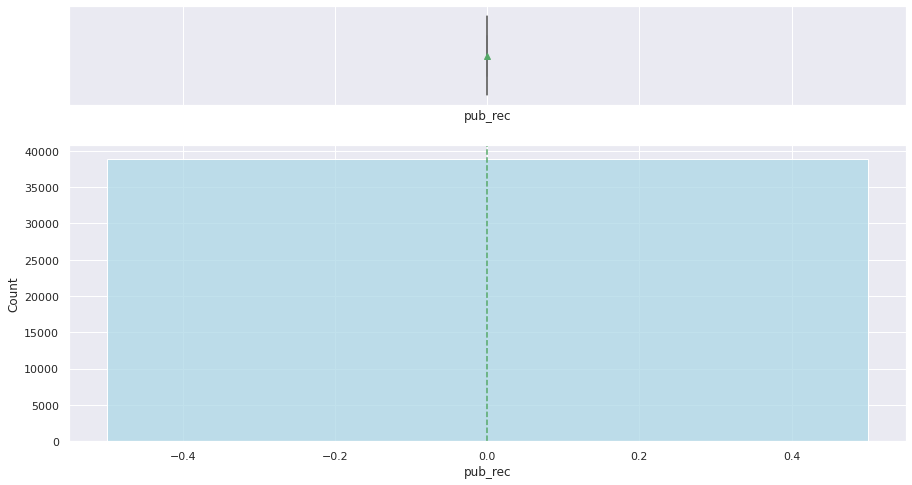

revol_bal
Skew : 1.05


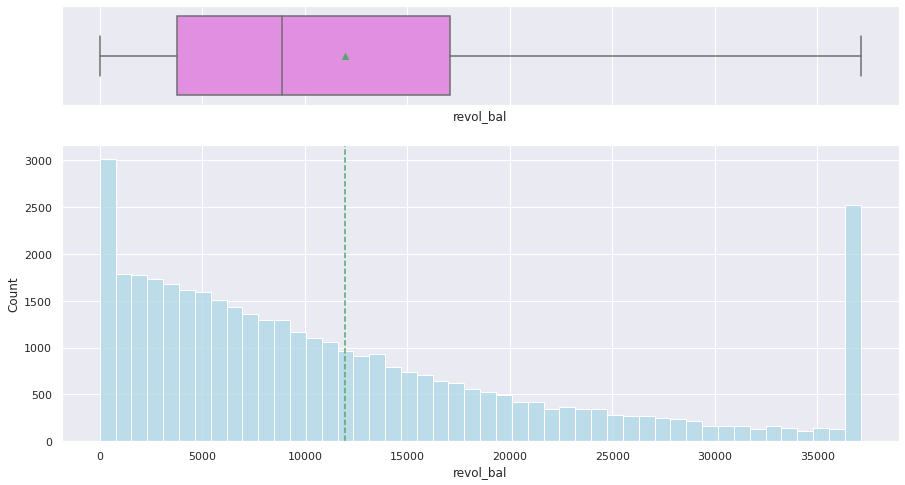

revol_util
Skew : -0.04


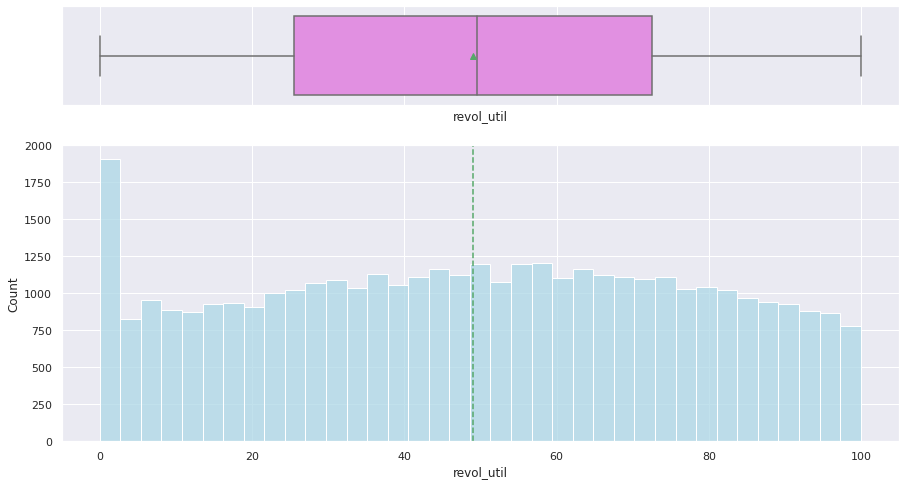

total_acc
Skew : 0.64


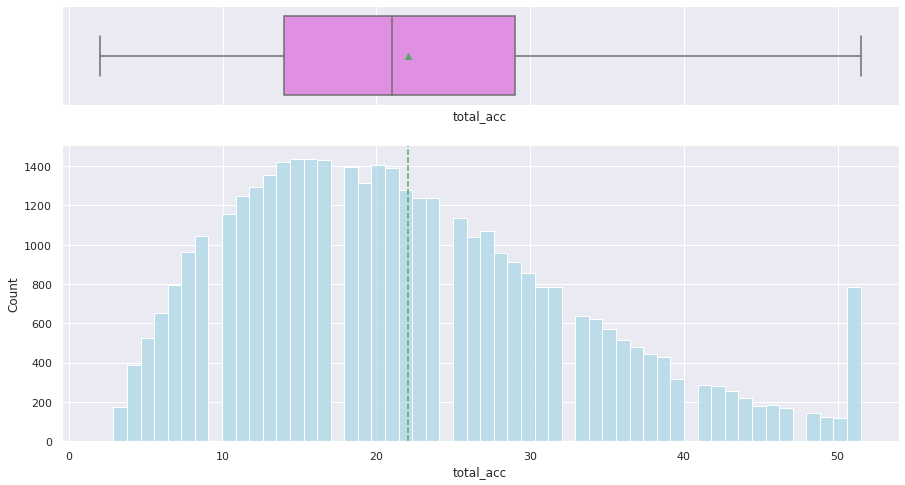

out_prncp
Skew : 0


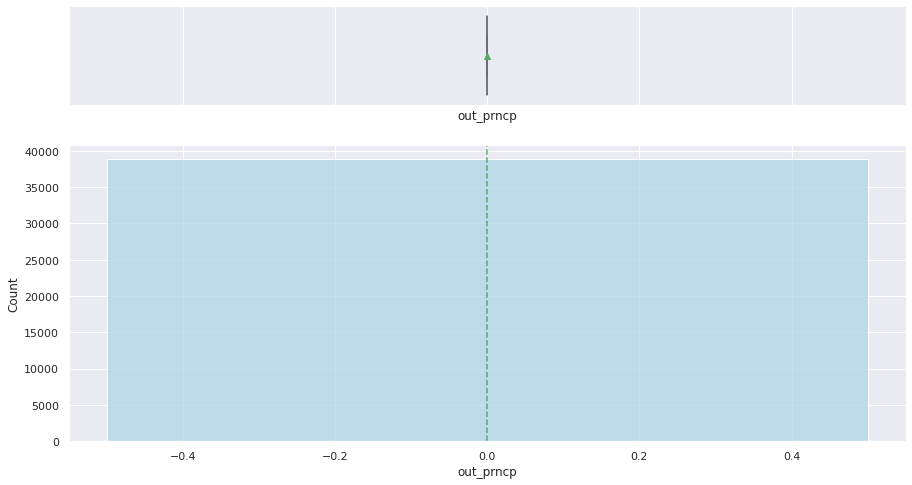

out_prncp_inv
Skew : 0


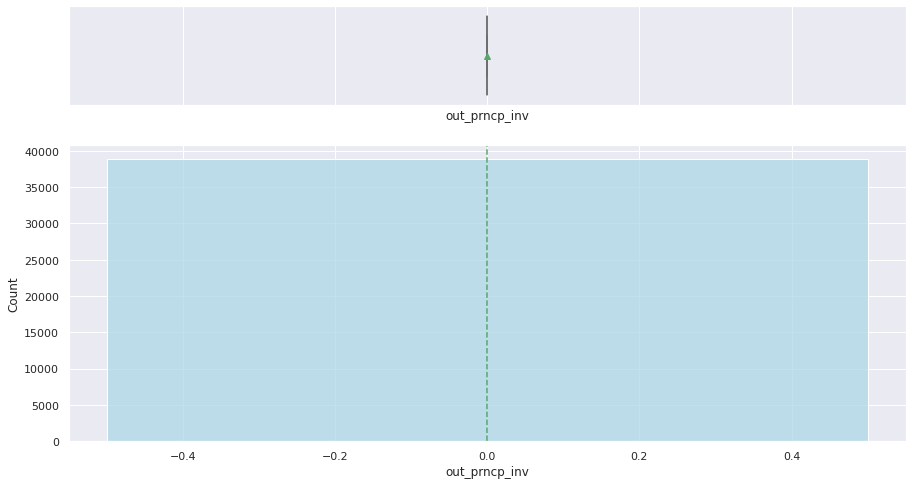

total_pymnt
Skew : 0.93


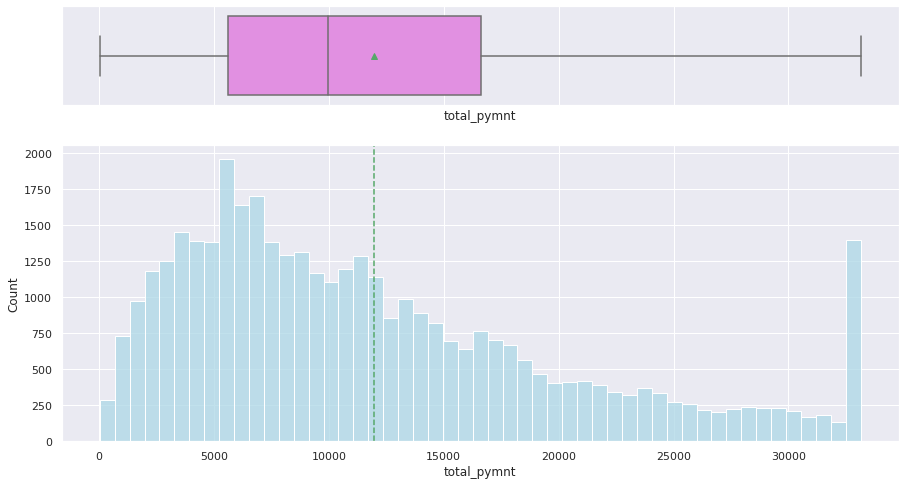

total_pymnt_inv
Skew : 0.93


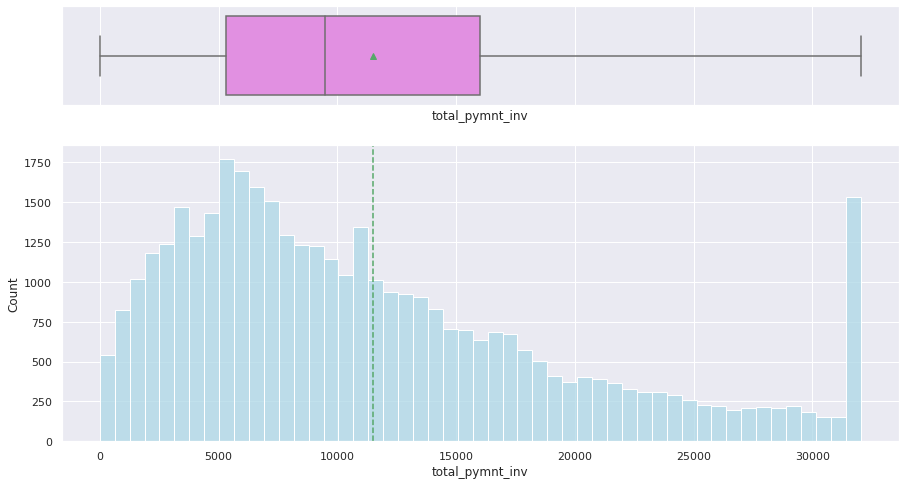

total_rec_prncp
Skew : 0.88


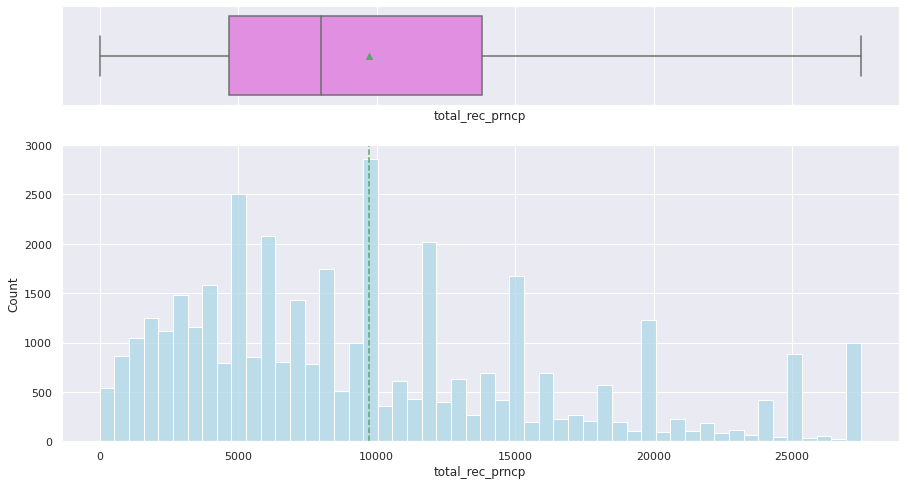

total_rec_int
Skew : 1.12


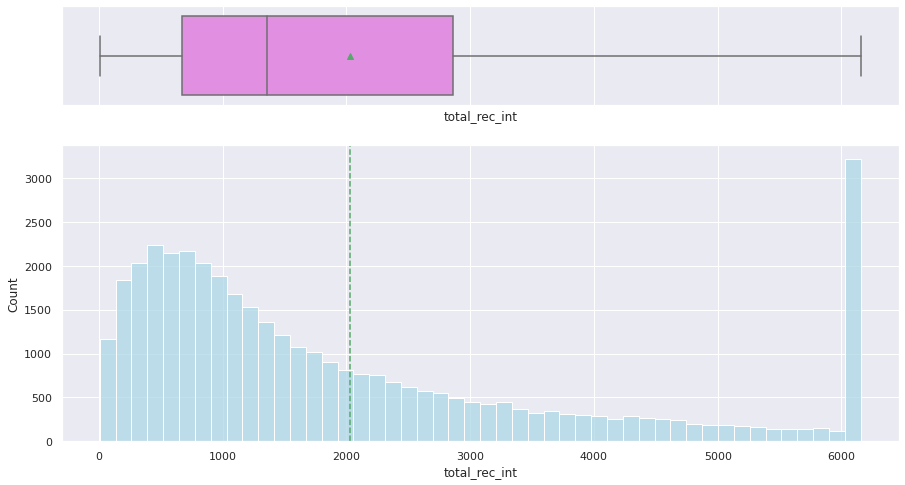

total_rec_late_fee
Skew : 0


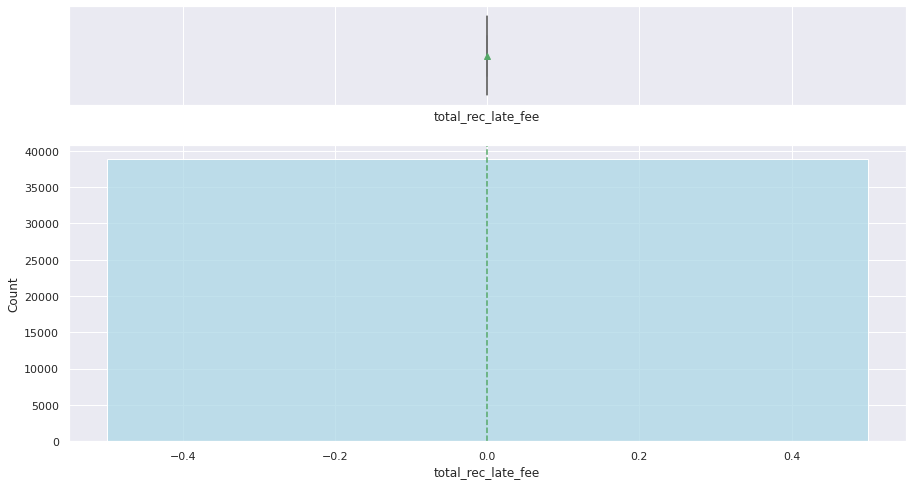

recoveries
Skew : 0


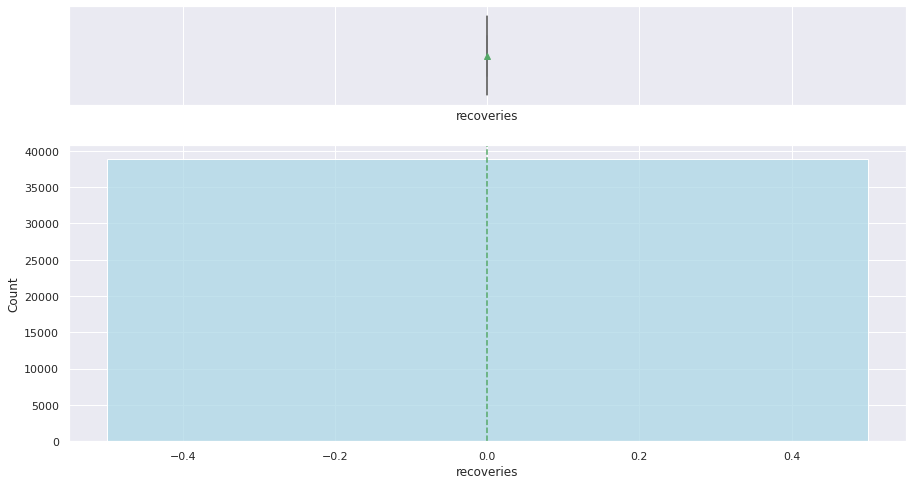

collection_recovery_fee
Skew : 0


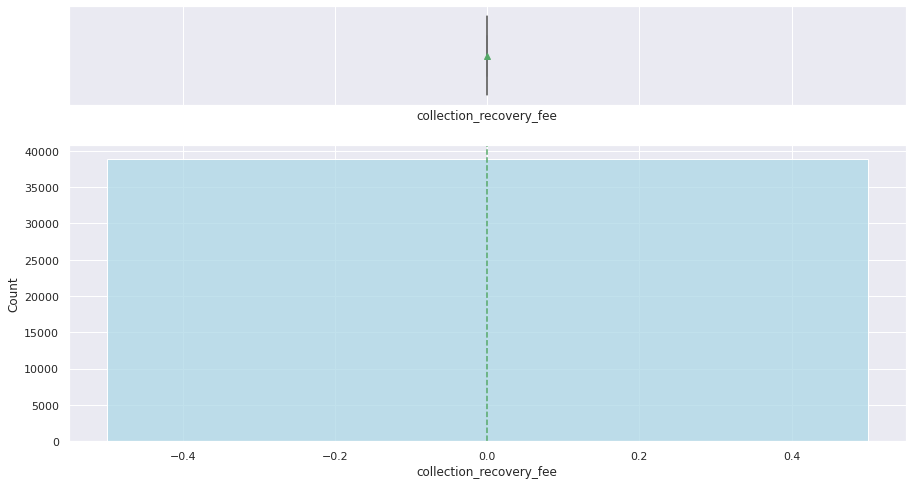

last_pymnt_amnt
Skew : 1.25


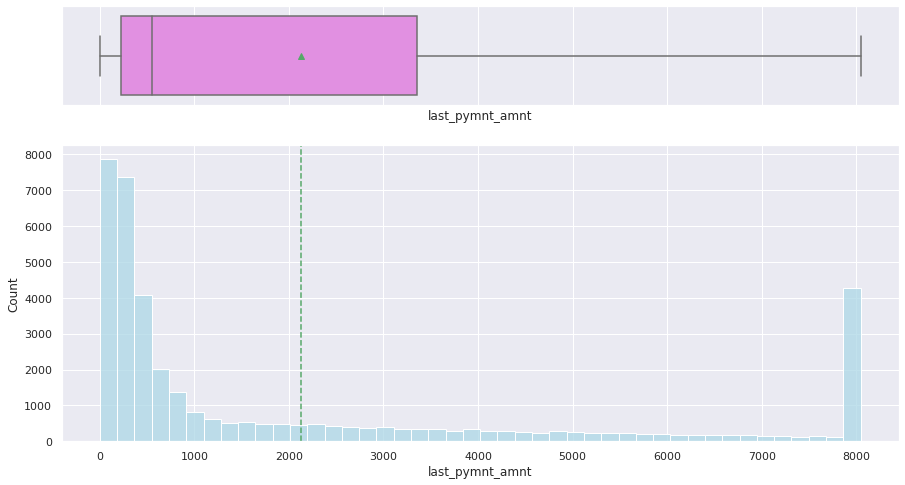

policy_code
Skew : 0


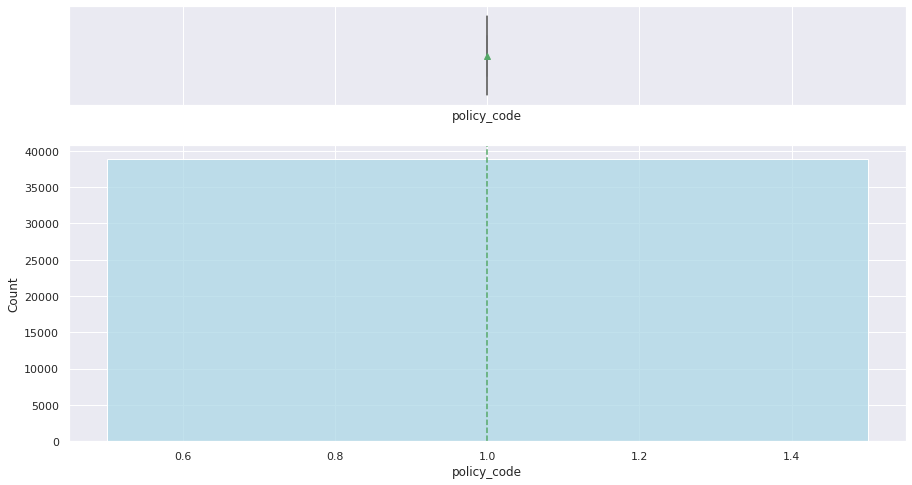

pub_rec_bankruptcies
Skew : 0


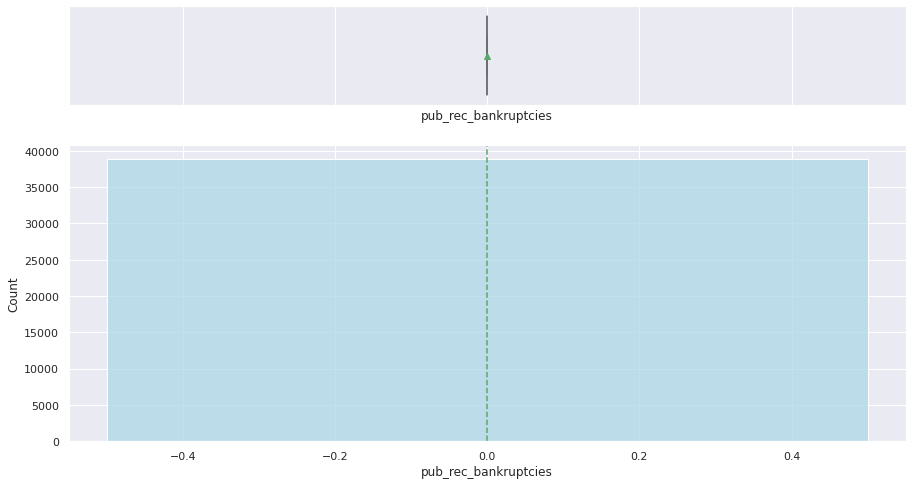

issue_d_year
Skew : -1.12


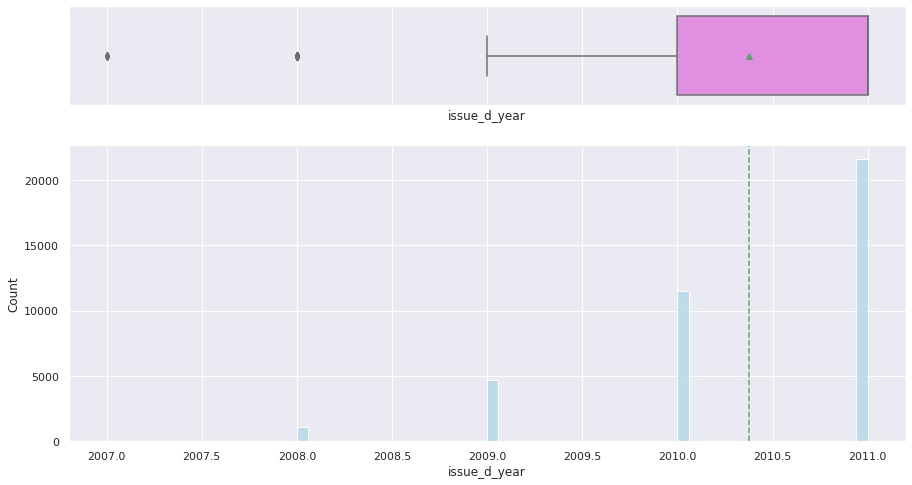

last_pymnt_year
Skew : -0.05


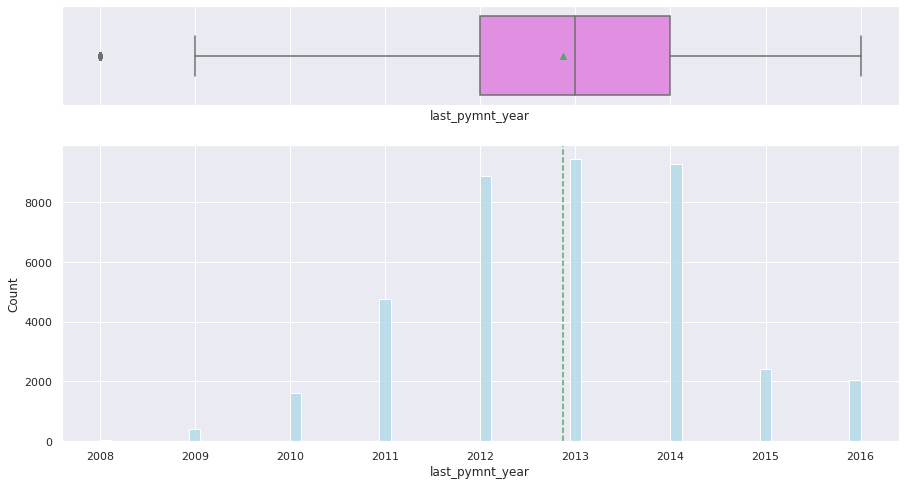

last_credit_pull_d_year
Skew : -0.75


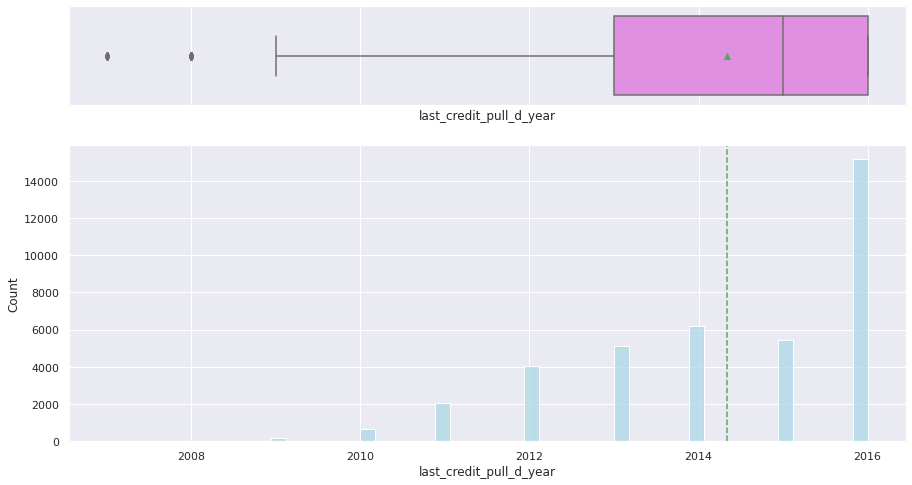

In [62]:
## Numerical Data Analysis
for col in num_col:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    histogram_boxplot(data[col], figsize=(15,8))

grade


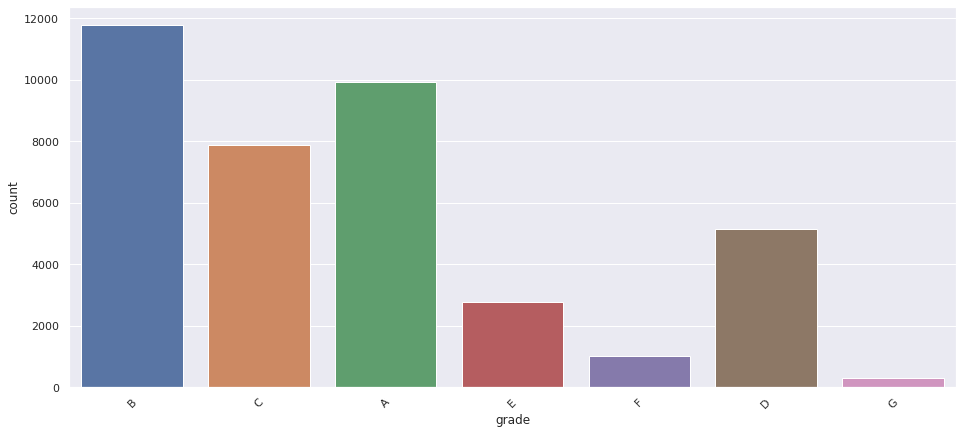

sub_grade


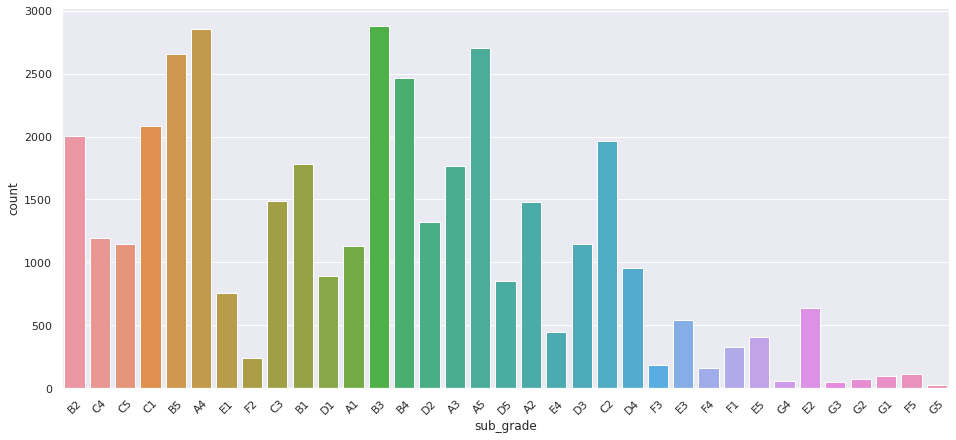

home_ownership


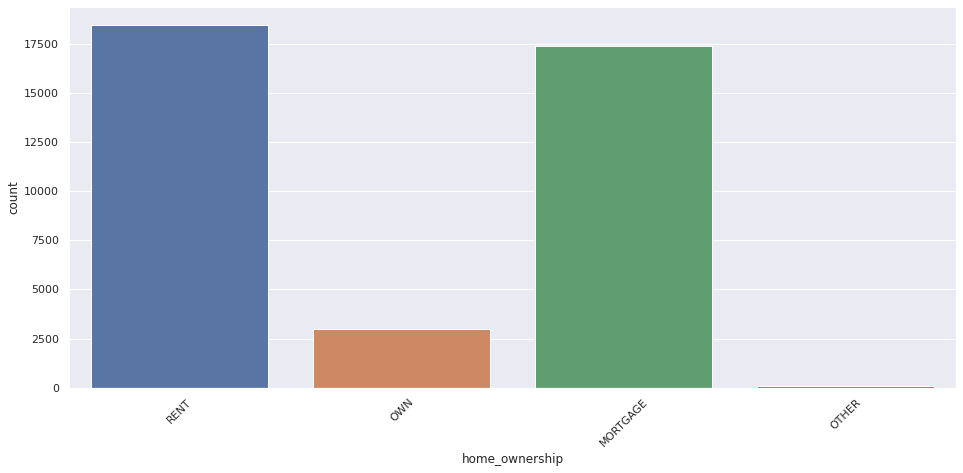

verification_status


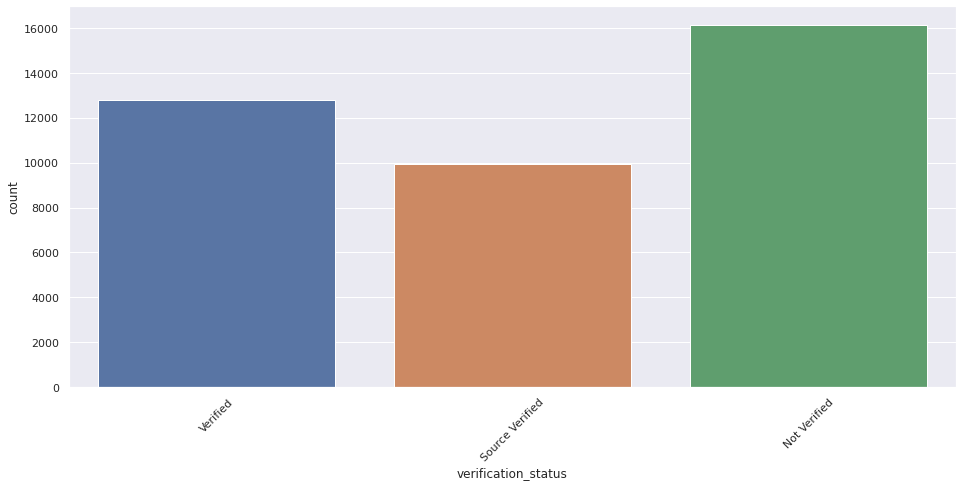

pymnt_plan


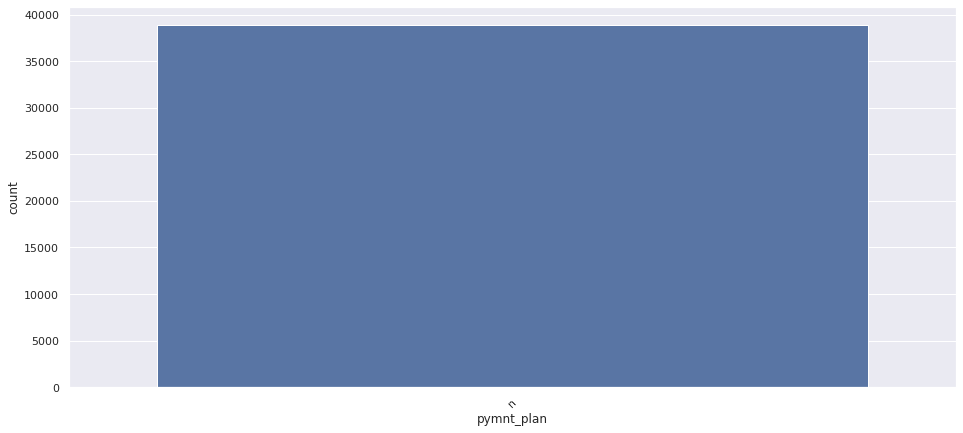

purpose


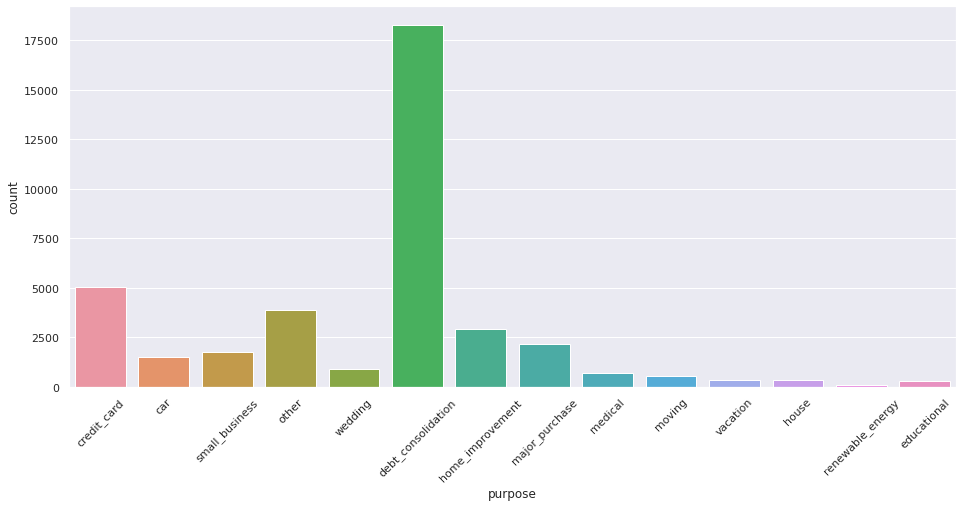

addr_state


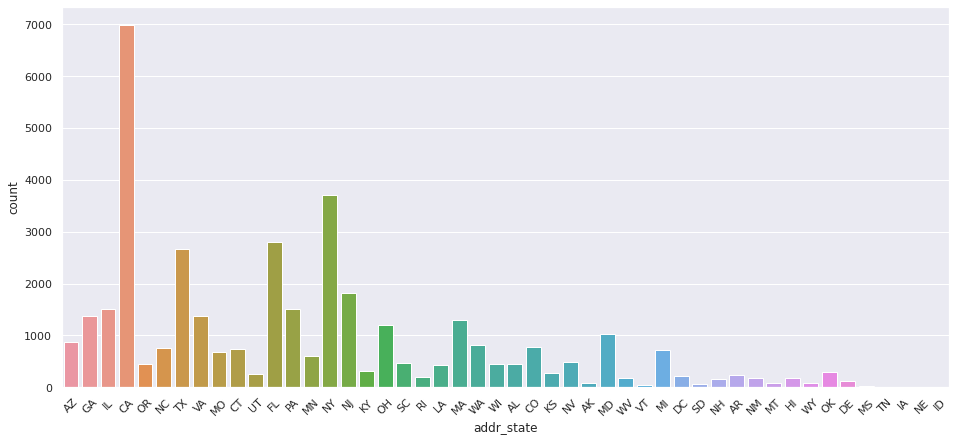

initial_list_status


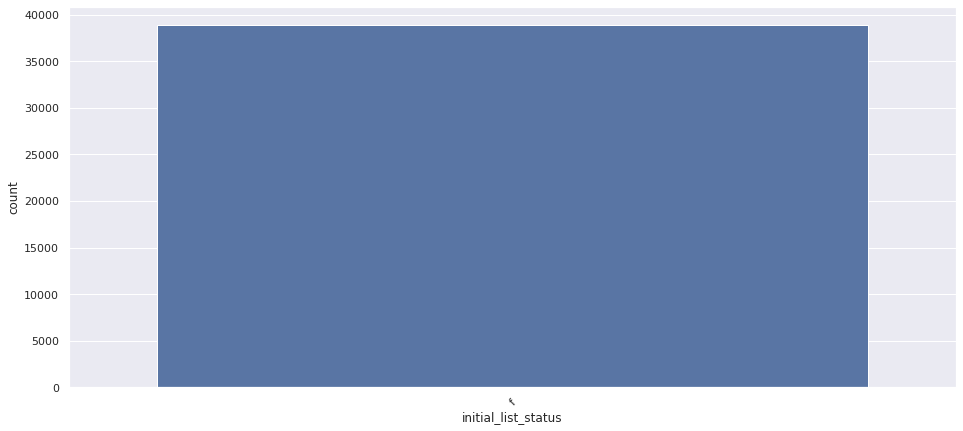

application_type


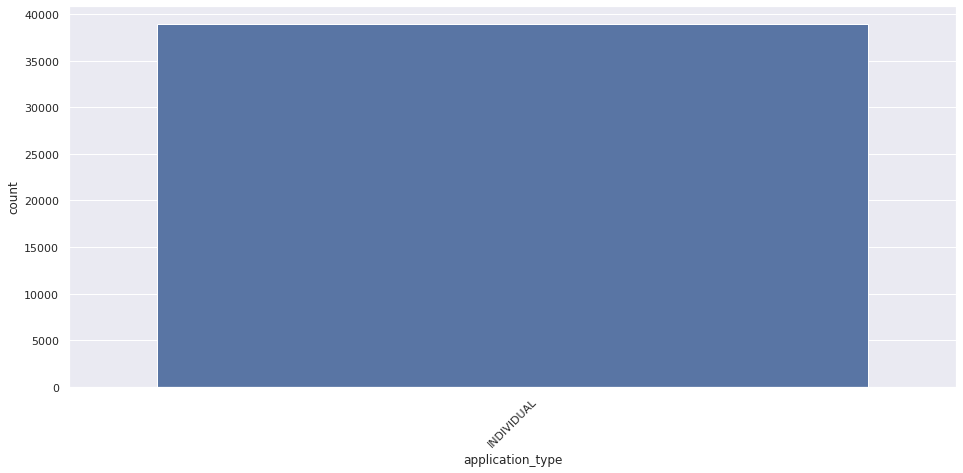

In [63]:
## Categorical Data Analysis
for col in cat_col:
    print(col)
    plt.figure(figsize=(35,7))
    plt.subplot(1,2,1)
    sns.countplot(x=data[col])
    plt.xticks(rotation=45)
    plt.show()

Observations
- The Loan amount in majority is between 5000 and 15000 with a presence of outliers on the variable.
- Term represent the number of payments on the loan, and the majority are choosing 36months. 
- Installment values are concentrated in the range of 150 and 450 payment pwe month, with a maximum of 850 per month, outliers also present on this variable.
-  Majority of loans are issued on 2010 and 2011.
- a big uptrend of the issued loans since 2007 till 2011.
- Loan grade B is the most assigned, folowed by A, C, D, E, F and G.
- Rent and Mortage is the most status of home_ownership during the registration for the loan.
- Majority of the customer’s income is not verified.
- Surprisenly most of customers purpose f taking the loan is because of debt_consolidation mainly.
- credit_card, other, home imrovementm major_purchase, small_business, car are other major motive for a customer to request the loan.

## Bivariate Analysis

In [64]:
## Function to plot stacked bar chart
def stacked_plot(x, title):
    sns.set(palette='Pastel2')
    tab1 = pd.crosstab(x,data['loan_status'],margins=True)
    tab = pd.crosstab(x,data['loan_status'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(15,8))
    plt.title(title)
    plt.show()

In [65]:
## Numerical Data Analysis

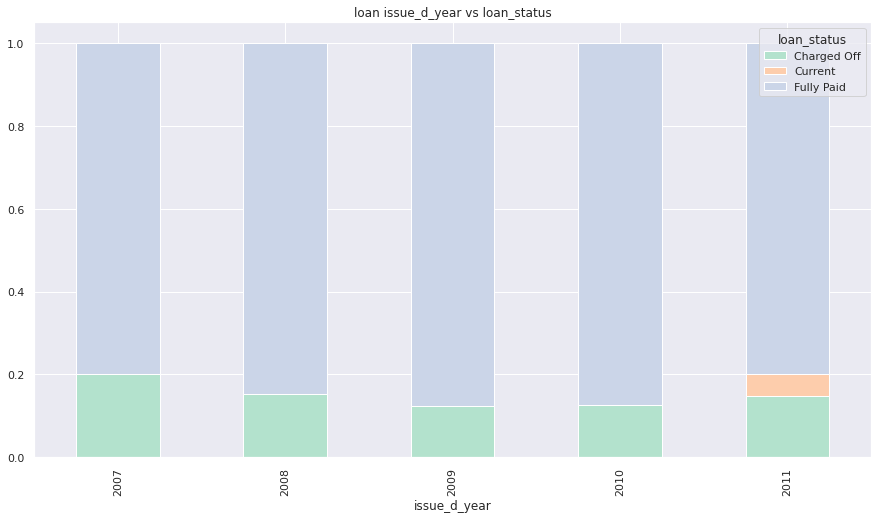

In [66]:
stacked_plot(data['issue_d_year'], "loan issue_d_year vs loan_status")

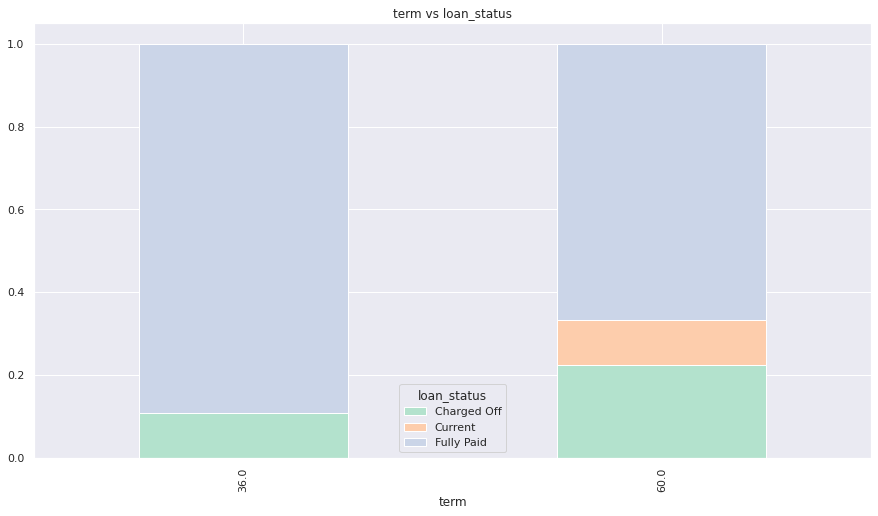

In [67]:
stacked_plot(data['term'], "term vs loan_status")

grade vs loan_status


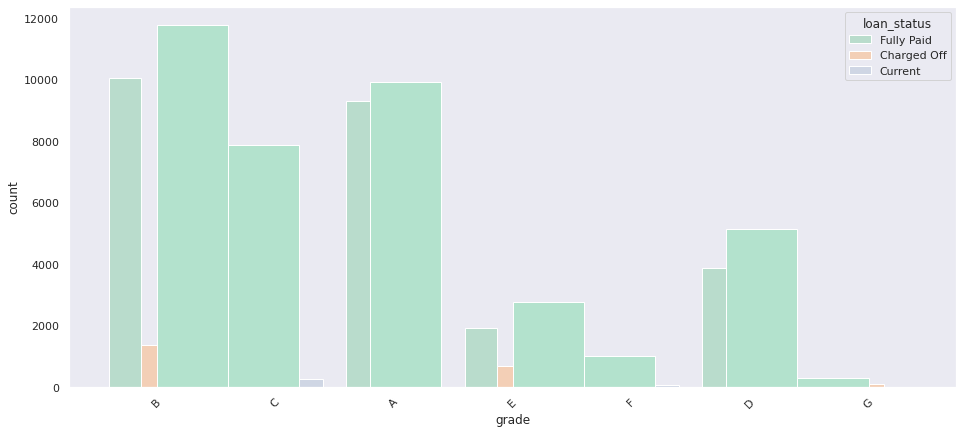

sub_grade vs loan_status


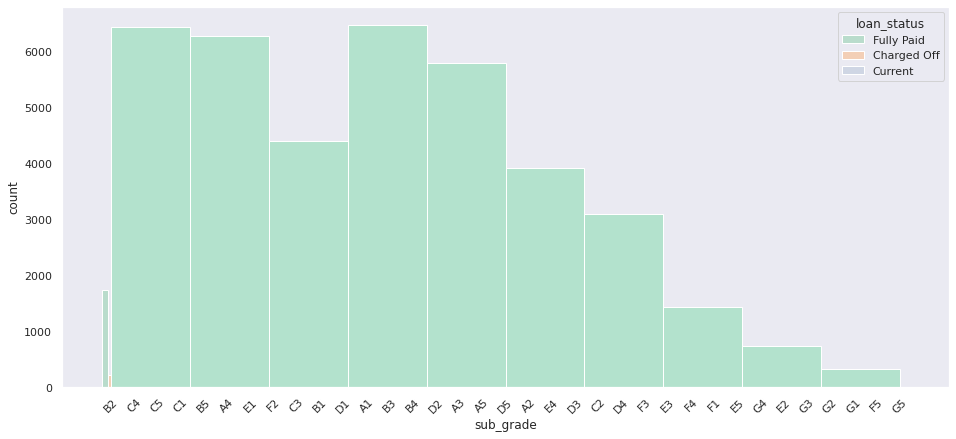

home_ownership vs loan_status


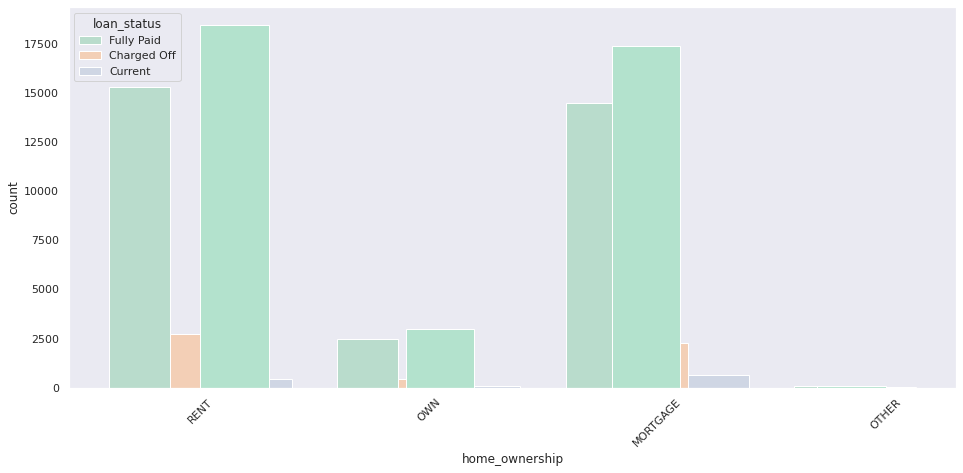

verification_status vs loan_status


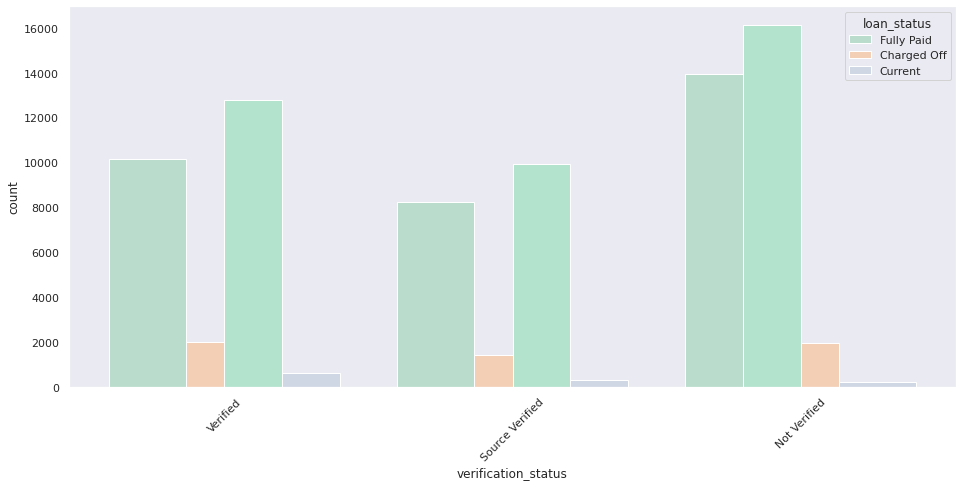

pymnt_plan vs loan_status


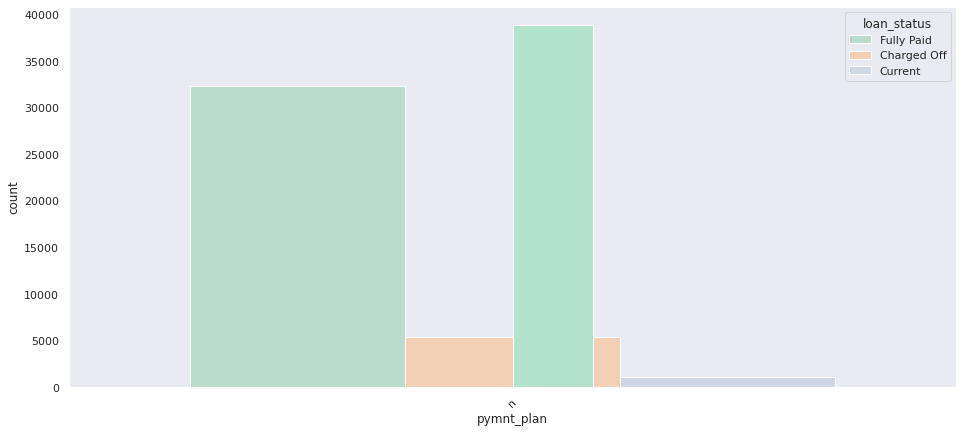

purpose vs loan_status


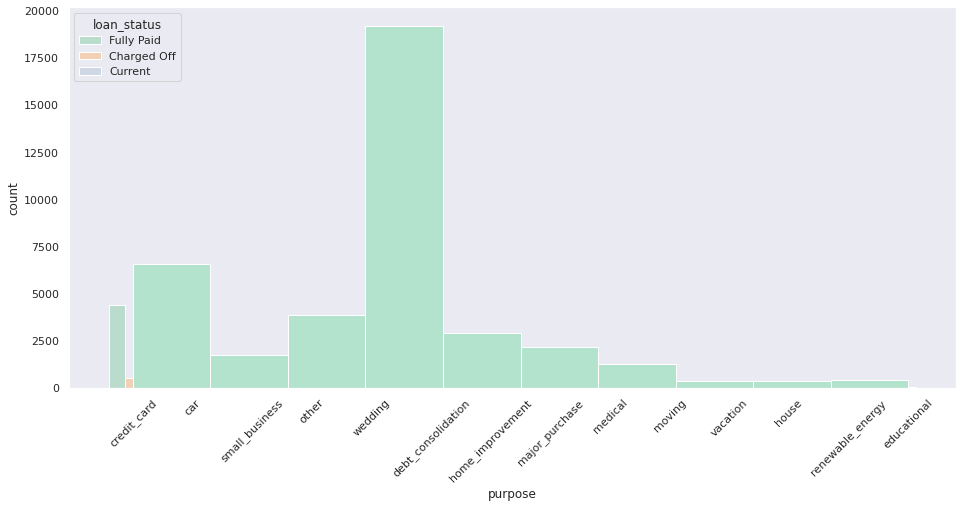

addr_state vs loan_status


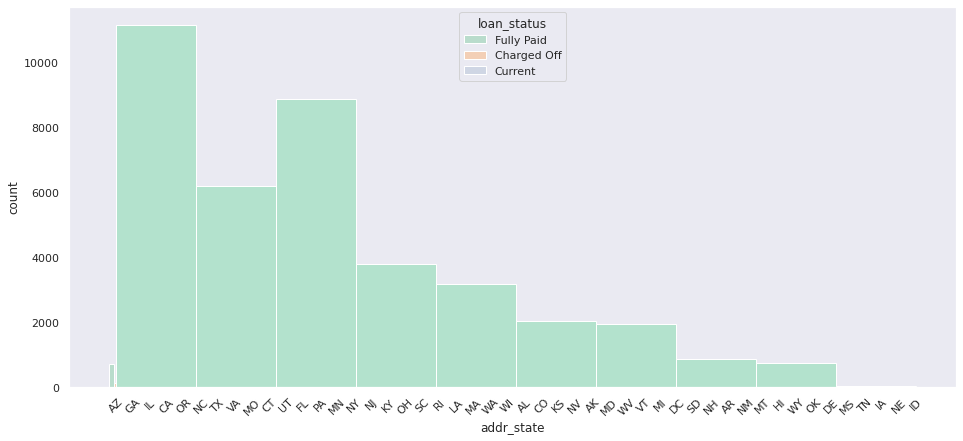

initial_list_status vs loan_status


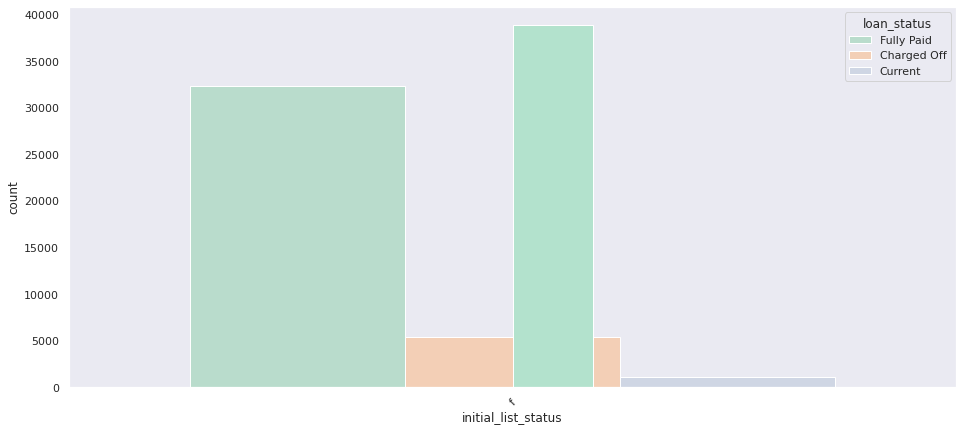

application_type vs loan_status


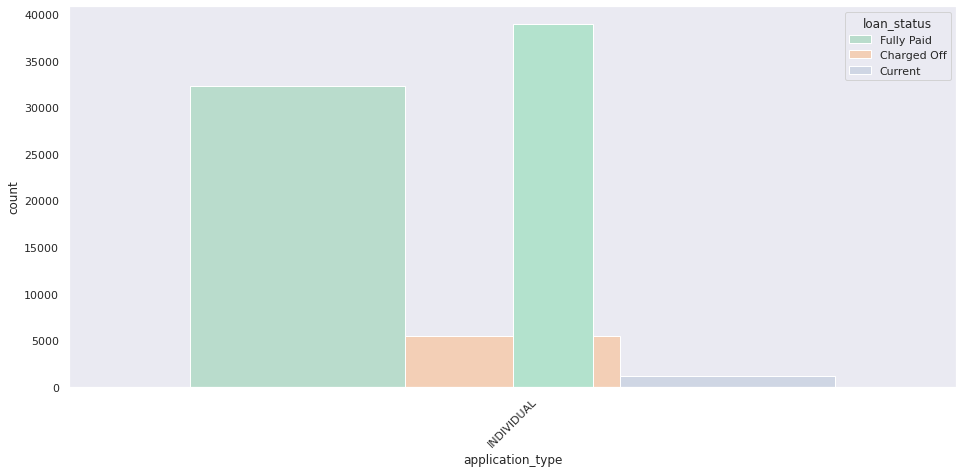

In [68]:
## Categorical Data Analysis
for col in cat_col:
    print(col, "vs loan_status")
    plt.figure(figsize=(35,7))
    plt.subplot(1,2,1)
    sns.countplot(x=data[col], hue=data['loan_status'])
    data[col].hist(bins=10, grid=False)
    plt.xticks(rotation=45)
    plt.show()

Observations:
- Loans with current status are present only when the term is 60months.
- Fully Paid loan is a common for all the home ownership status. 
- Verifying the income is not necessary to determine the loan status.
- Majority of purposes f the loan are fuly paid, and wedding is the top of the list.

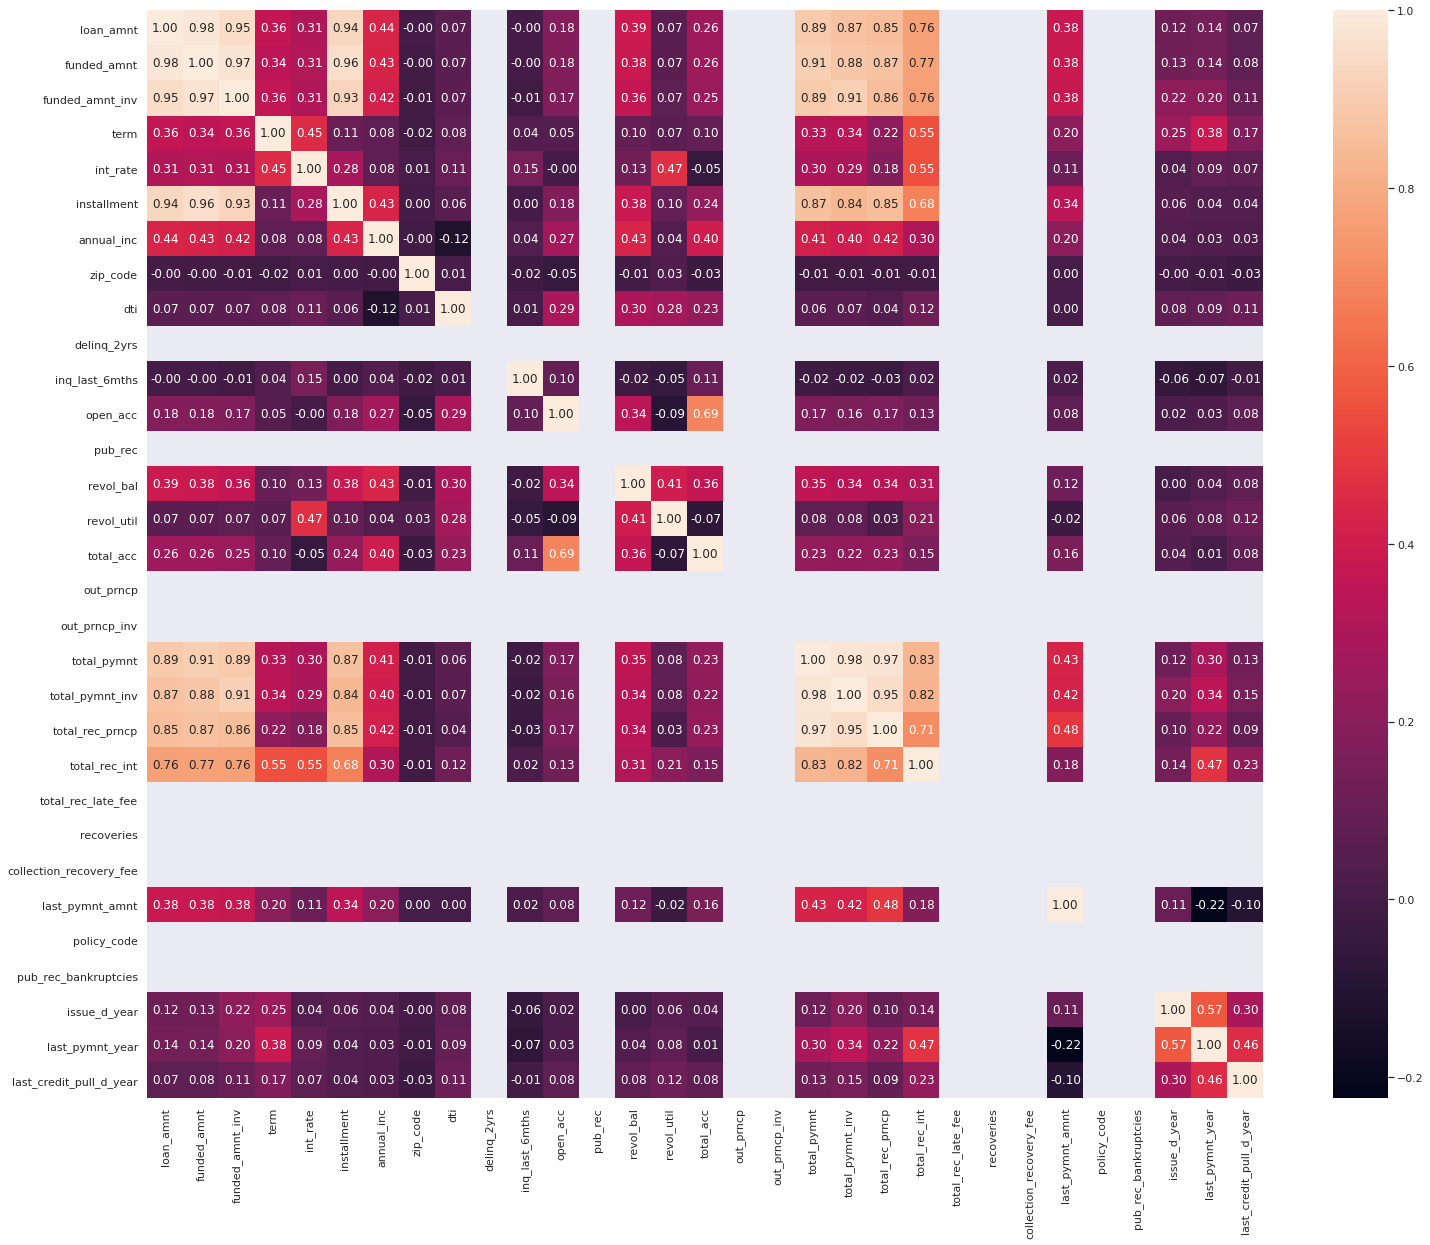

In [69]:
plt.figure(figsize=(25, 20))
sns.heatmap(data[num_col].corr(), annot=True, fmt=".2f")
# sns.clustermap(data[num_col].corr(), annot=True, figsize=(12, 8), cmap="BrBG")
plt.show()

Observations:
- Highly positive correlated variable between eachother : ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_paymnt', 'total_paymnt_inv', 'total_rec_pmcp', 'total_rec_int'].
- pub_rec_bankruptcies is hight positive correlated with pub_rec.
- collection_recovery_fee is highly positive correlated with recoveries.

# Insights and Recommendations

- Majority of customers are fully-paid {83%} followed with the customer that are charged Off {14%} and didn't pay the due installment on time.
- Rent and Mortgage is the most status of home_ownership during the registration for the loan.
- Loans with “current status” are present only when the term is 60 months.
- Fully Paid loan is a common for all the home ownership status. 
- Majority of purposes of the loans are fully paid, and wedding is the top of the list.
- Verifying the income is not necessary to determine the loan status.
- Installment values are concentrated in the range of 150 and 450 payment per month, with a maximum of 850 per month.